# DTSC 5301 Project Coding
## **FOOD WASTE MANAGEMENT**
---

---
Authors/Members

*   anujanil.hundia@colorado.edu        - Anuj Hundia
*   pranit.katwe@colorado.edu           - Pranit Katwe
*   sarthak.katyal@colorado.edu         - Sarthak Katyal
*   shrutisunil.wakchoure@colorado.edu  - Shruti Wakchoure
*   siddhant.sharma@colorado.edu        - Siddhant Sharma
*   junsoo.jung@colorado.edu            - Junsoo Jung

---





## Introduction

In today's rapidly evolving world, we are witnessing an unprecedented rate of population growth and an ever-accelerating development of the food chain. With such advancements, the challenges posed by food loss and waste (FLW) have come to the forefront of global concerns. In May 2015, during Turkey's presidency of the G20, the world's agriculture ministers united in recognizing FLW as "a global problem of enormous economic, environmental, and societal significance." They called upon all G20 member nations to intensify their collective efforts to prevent and reduce FLW.

Despite the collective efforts to combat food loss and waste (FLW), it remains a persistent issue that hampers our sustainability goals and exacerbates the global food security crisis. The consequences of FLW extend beyond economic losses, with far-reaching environmental and social implications. We are in a race against time to minimize the detrimental effects of FLW on our planet, economies, and the well-being of present and future generations.

The Food and Agriculture Organization of the United Nations (FAO) stands at the forefront of global organizations committed to tackling this pressing issue. The FAO has set an ambitious yet vital goal: "to halve the per capita global food waste at the retail and consumer level by 2030, and reduce food losses along production and supply chains, including post-harvest losses." This commitment reflects a collective determination to turn the tide on FLW and aligns with the broader global sustainability agenda.

The FAO's consistent commitment to battling FLW serves as motivation for our group. As people who care strongly about the health of our planet and its inhabitants, we have taken on the job of determining and prioritizing the most important problems related to food waste. We understand that resolving these issues will help the FAO achieve its lofty objectives while also paving the road for a more just and sustainable food system for all. We examine the urgent problems that demand our immediate attention as well as the creative solutions that offer the promise of a more sustainable food future in the pages that follow as we delve into the multifaceted complexity of FLW.


### Goal of this project

 Our project entails rigorous data analysis that will not only uncover trends and patterns but also pinpoint the root causes of food waste across various sectors of the food supply chain. By conducting thorough analyses, we will discern which stages of the food supply chain are most susceptible to waste, whether it be during production, transportation, storage, or consumer handling. Our objective is to provide a clear roadmap that prioritizes the critical areas where interventions are needed most urgently.


### Initial setup

We will start using the following libraries for data analysis and visualization.
Pandas for dataframe usage and data cleaning. Matplotlib and Seaborn for visualization.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

We brought data from the Food and Agriculture Organization of the United Nations ranging from the year 2012 to 2022. This database includes data and information from publicly available databases, reports, and studies that measure food loss and waste across food products, stages of the value chain, and geographical areas. FAOUN has made this data available to anyone who wants to learn more about food waste and loss. Some of the important features of the dataset include the year in which the food was wasted, the country in the picture, the commodity, the stage at which the item was wasted, the quantity of loss, the percentage of loss, and the method of collection of data with references.


Original link to the data : https://www.fao.org/platform-food-loss-waste/flw-data/en/

In [2]:
#Reading CSV
food_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1h0k2vygma2sihMRTr8PlthgoFGHpZbNpMbAi7cUWlyI/export?format=csv')
food_data.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,Storage,"30 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,Storage,"60 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,Storage,"30 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,Storage,"60 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,Storage,"90 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically


### Data cleaning and sorting

In our data analysis project, we concentrated on key and well-known aspects connected to food waste, and as part of our data pretreatment, we deleted unneeded columns to streamline and refine our dataset. Following this data cleansing process, we chose the 'loss_percentage' column as our key focus.


##### Cleaning Methods

It is evident that data in columns like region, loss_quantity, and cause_of_loss are having null values more than the permissable levels ( Considered threshold level as 15% ). As the percentage of null values is very huge, it is better to remove those columns. Thats why we are removing these columns.
*   Reason of removing 'm49_code' : this is country code, which is belongs to column 'country'.
*   Reason of removing 'cpc_code' : this is country code, which is belongs to column 'commodity'.
*   Reason of removing 'method_data_collection' : this is not related to our main column 'loss_percentage'.

In [3]:
percent_missing = food_data.isnull().sum() * 100 / len(food_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
m49_code,0.000000
country,0.000000
region,94.929863
cpc_code,0.000000
commodity,0.000000
year,0.000000
loss_percentage,0.000000
loss_percentage_original,0.000000
loss_quantity,97.760690
activity,10.520534


In [4]:
# Data Cleaning by removing lower priority columns.
food_data.drop(['m49_code','region','cpc_code','treatment','loss_quantity','sample_size','method_data_collection','reference','url','notes'],inplace=True,axis=1)
food_data

,country,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,cause_of_loss
0,Myanmar,"Rice, milled",2015,1.78000,1.78%,Storage,Storage,Rodents
1,Myanmar,"Rice, milled",2015,11.77000,11.77%,Storage,Storage,Rodents
2,Myanmar,"Rice, milled",2015,5.88000,5.88%,Storage,Storage,Rodents
3,Myanmar,"Rice, milled",2015,3.57000,3.57%,Storage,Storage,Rodents
4,Myanmar,"Rice, milled",2015,17.65000,17.65%,Storage,Storage,Rodents
...,...,...,...,...,...,...,...,...
11829,Zambia,Millet,2012,2.50000,2.5,Transportation,Farm,NaN
11830,Zambia,Millet,2012,2.61001,2.61001,Storage,Storage,NaN
11831,Zambia,Millet,2012,1.28543,1.28543,Storage,Farm,NaN
11832,Zambia,Millet,2012,3.48739,3.48739,"Drying, Harvesting",Harvest,NaN


This is the cleaned data after removing the columns which were not important for our analysis and above are the important columns that we are going to use in our analysis and our visualization for better understanding.

#### 1. Food waste caused by Stage

A "Food Waste Caused by Stage" graph generated from the dataset provided can offer critical insights for effective food waste management. It helps identify which stages in the food supply chain contribute most to food waste, allowing for targeted interventions, resource allocation, policy development, supply chain optimization, consumer awareness campaigns, and the setting of reduction targets. By focusing efforts on the most significant contributors, stakeholders can reduce food waste, achieve cost savings, and minimize environmental impact, thus fostering a more sustainable and efficient food system.

From the cleaned data, we start with comparing loss percentage and stage. Since there are multiple values of loss_percentage present in each of the stages, it is important to group them together and find the mean of each unique category.
After getting a mean value, we wants to see what is the highest reason of the loss. So, we sorted by order of `loss_percentage`.

In [5]:
stage_loss=food_data[['food_supply_stage','loss_percentage']]
food_data['food_supply_stage'] = food_data['food_supply_stage'].astype(str)
mean_stage_loss = stage_loss.groupby(stage_loss['food_supply_stage']).mean()
sorted_stage = mean_stage_loss.sort_values(by='loss_percentage',ascending=False)

##### Visualization.

To analyze effectivly, we visualize the sorted data. To check which stage has the highest loss percentage where food is getting wasted.

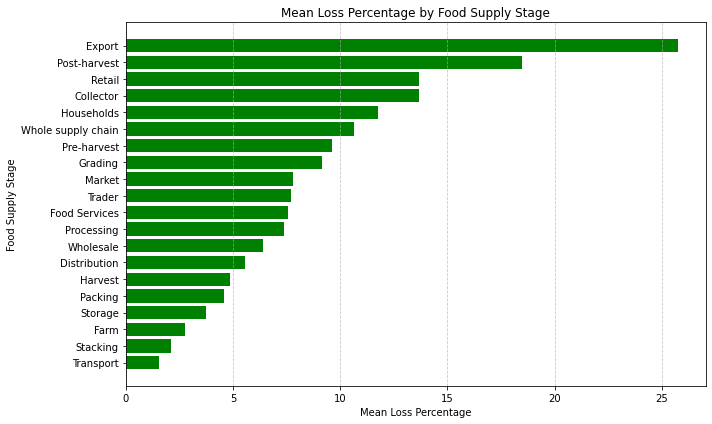

In [6]:
food_supply_stage = sorted_stage.index
mean_loss_percentages = sorted_stage['loss_percentage']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(food_supply_stage, mean_loss_percentages, color='green')

# Added labels to both axes and title
plt.xlabel('Mean Loss Percentage')
plt.ylabel('Food Supply Stage')
plt.title('Mean Loss Percentage by Food Supply Stage')

# To Add vertical grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

#Adjust plot layout for better spacing
plt.tight_layout()

#Invert y-axis to get the highest value on top
plt.gca().invert_yaxis()
plt.show()

A horizontal bar chart is particularly useful for visualizing the "Food Waste Caused by Stage" graph in food waste analysis. It allows for easy comparison of mean loss percentages among different food supply stages, efficiently uses space, accommodates long labels, provides a natural ranking with the highest value at the top, enhances readability, is aesthetically pleasing, and emphasizes critical areas of high food waste. This choice aligns with the goal of swiftly identifying key contributors to food waste and effectively conveying this information to stakeholders and decision-makers.

The chart provides information on the mean loss percentage at different stages of the food supply chain. The x-axis represents the mean loss percentage, ranging from 0 to 25, while the y-axis lists various stages of the food supply chain, including Transport, Stacking, Farm, Storage, Packing, Wholesale, Distribution, Food Traders, Market, Grading, Pre-harvesting, Households, Retail, Collector, Post-harvest, and Export. The bars in the chart are color-coded green and represent the mean loss percentage for each stage.

The chart reveals that the highest mean loss percentage is observed at the Export stage, with a value of approximately 25%. On the other hand, the Transport stage has the lowest mean loss percentage at around 5%.

In [7]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called 'food_data'
# Make sure you have columns 'year', 'commodity', and 'loss_percentage'

# Filter data for the years 2021 and 2022
data_2021 = food_data[food_data['year'] == 2021]
data_2022 = food_data[food_data['year'] == 2022]

# Merge the data for 2021 and 2022 based on 'commodity' column
merged_data = pd.merge(data_2021, data_2022, on='food_supply_stage', suffixes=('_2021', '_2022'))

# Calculate the change in loss percentage
merged_data['loss_percentage_change'] = merged_data['loss_percentage_2022'] - merged_data['loss_percentage_2021']

# Select relevant columns
result_df = merged_data.groupby('food_supply_stage')['loss_percentage_change'].mean().reset_index()


# Display the result
print(result_df)

    food_supply_stage  loss_percentage_change
0                Farm               -0.054798
1             Harvest                2.472219
2             Storage                1.448327
3  Whole supply chain               -1.486667


#### 2. Food waste caused by Year

The "Food Waste  by Year" chart derived from the presented data set provides valuable information on effective food waste management.

 Time Analysis: The graph allows you to track trends in food waste  over different years and shows whether waste levels are increasing, decreasing or remaining stable. This temporal perspective is crucial for understanding the dynamics of food waste.

 Identification of patterns and anomalies. In certain years, it is possible to identify sudden spikes or drops in food waste that provide clues about unique events or contributing factors.

Here we start with comparing loss percentage and year by taking two columns `year` and `loss_percentage`. Here we will take mean of each year of loss percentage to represent the mean loss percentage of each year. Now we will sort this value from highest to lowest using `loss_percentage` and by using `ascending=False`

In [8]:
year_loss=food_data[['year','loss_percentage']]
mean_year_loss = year_loss.groupby(year_loss['year']).mean()
sorted_year = mean_year_loss.sort_values(by='loss_percentage',ascending=False)


##### Visualization.

Here we plot the the value of mean loss percentage of each year with sorted data. We can see that 2022 has the highest mean loss percentage.


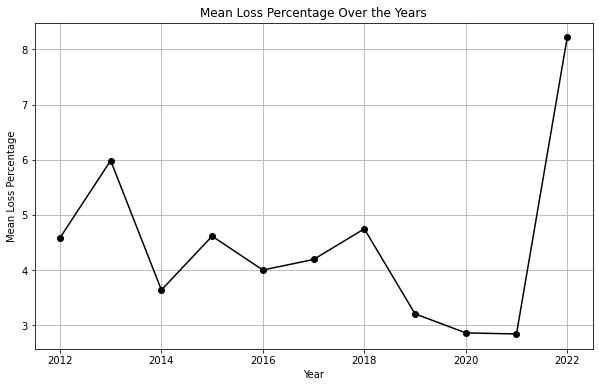

In [9]:
#visualization here
years = sorted_year.index
mean_loss_percentages = sorted_year['loss_percentage']

years = mean_year_loss.index
mean_loss_percentages = mean_year_loss['loss_percentage']

# Create a line plot usking marker and linestyle
plt.figure(figsize=(10, 6))
plt.plot(years, mean_loss_percentages, marker='o', linestyle='-', color='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Loss Percentage')
plt.title('Mean Loss Percentage Over the Years')

# Show the plot
# Add grid lines
plt.grid(True)
plt.show()

A line plot is a useful visualization tool for representing the “Food Waste Caused by Stage” graph. Here's why it is particularly suitable for this purpose :  A line plot allows for the examination of mean loss percentages over time. By plotting the data points for each year and connecting them with lines, it becomes easier to identify trends and patterns in food waste across different stages of the food supply chain. Comparison of Mean Loss Percentages: The line plot enables a direct comparison of mean loss percentages between stages. By visualizing the data in this way, it becomes apparent which stages have higher or lower mean loss percentages, aiding in the identification of critical areas for intervention and improvement.

Identification of Outliers: Outliers, such as significant spikes or drops in mean loss percentages, can be easily identified on a line plot. These outliers may indicate specific years or stages that require further investigation or targeted interventions

There wasn't much changes from 2012 to 2021. But the graph suggest there were drastic changes which took place from 2021 to 2022. There was a massive increase of 5%.

#### 3. Food waste caused by Country

Here we start with comparing loss percentage by country by taking two columns `country` and `loss_percentage`.

In [10]:
country_loss=food_data[['country','loss_percentage']]
mean_country_loss = country_loss.groupby(country_loss['country']).mean()
sorted_country = mean_country_loss.sort_values(by='loss_percentage',ascending=False)

Here we will take mean of country to avoid duplicates. So we will get one value for each country for better visulization.

Now we will sort this value from highest to lowest using `loss_percentage` and by using `ascending=False`

Here we can see a table with 105 countries and their mean loss percentage. We cannot plot the table for 105 countries. So we will plot the top 20 countries.

##### Visualization

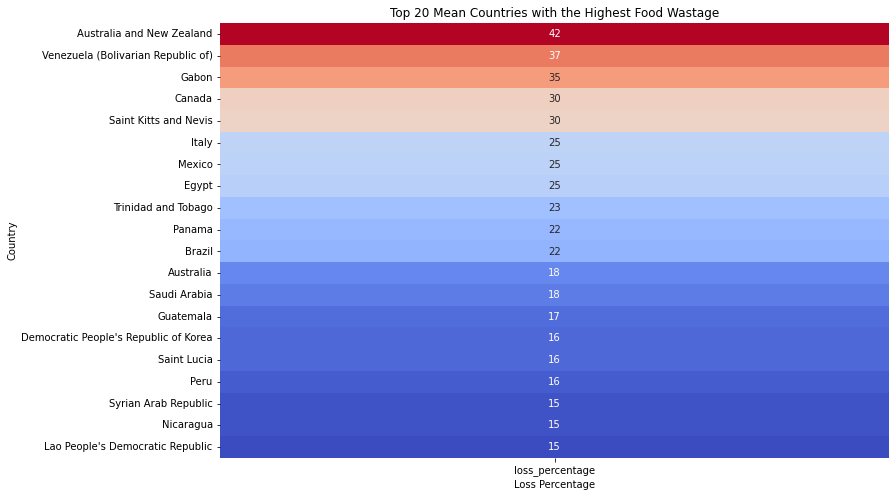

In [11]:
#We want to see the top 20 countries so we will create a new dataframe for that
top_20_countries = sorted_country.head(20)

# Create a heatmap with values for the top 20 countries
plt.figure(figsize=(12, 8))
sns.heatmap(top_20_countries[['loss_percentage']], annot=True, cmap="coolwarm", cbar=False)

# Add labels and title
plt.xlabel('Loss Percentage')
plt.ylabel('Country')
plt.title('Top 20 Mean Countries with the Highest Food Wastage')

# Show the plot
plt.show()

A heat map is used to depict variation in data using colours to indicate change. Here countries with highest food wastage is represented in the red colour, which is being changed constantly with changing data values to dark blue representing the least food wastage by a country.

 Australia and New Zealand represented by red colour are the table toppers with 42% mean loss in food. Whereas, Lao People's Democratic Republic represented by deep blue colour are the least with around 15% mean loss in food.

#### 4. Food waste caused by Commodity

In this case we will take the `commodity` and `loss_percentage`. With this two columns, we will get the mean loss percentage of each commodity.
Here, we will take the mean of each commodity to represent the mean loss percentage of each commodity. With this we will get 130 rows but we want to see the top 10 commodities with the highest mean loss percentage. And there are some names in this commodity column which we don't want to show in the visualization. So we will rename them because they are not looking good in the visualization.
Here we will sort this value from highest to lowest using `loss_percentage` and by using `ascending=False` and display the top 10.


In [12]:
commodity_loss=food_data[['commodity','loss_percentage']]
mean_commodity_loss = commodity_loss.groupby(commodity_loss['commodity']).mean()
mean_commodity_loss = mean_commodity_loss.rename(index={'Snails, fresh, chilled, frozen, dried, salted or in brine, except sea snails' : 'Snails, except sea snails'})
mean_commodity_loss = mean_commodity_loss.rename(index={'Meat of pig with the bone, fresh or chilled' : 'Pork with bones'})
sorted_commodity = mean_commodity_loss.sort_values(by='loss_percentage',ascending=False)
sorted_commodity.head(10)

,loss_percentage
commodity,
"Snails, except sea snails",50.000000
Grapefruit juice,44.999350
Orange juice,43.916843
Pineapple juice,41.333300
Pork with bones,40.910000
Canned mushrooms,35.000000
Plantains and cooking bananas,30.241667
Cocoa beans,30.000000
"Broad beans and horse beans, green",30.000000


##### Visualization.

This visualization shows the top 10 commodities with the highest mean loss percentage. We can see Snails, except sea snails has the highest mean loss percentage and Sweet corn, frozen has the lowest mean loss percentage.

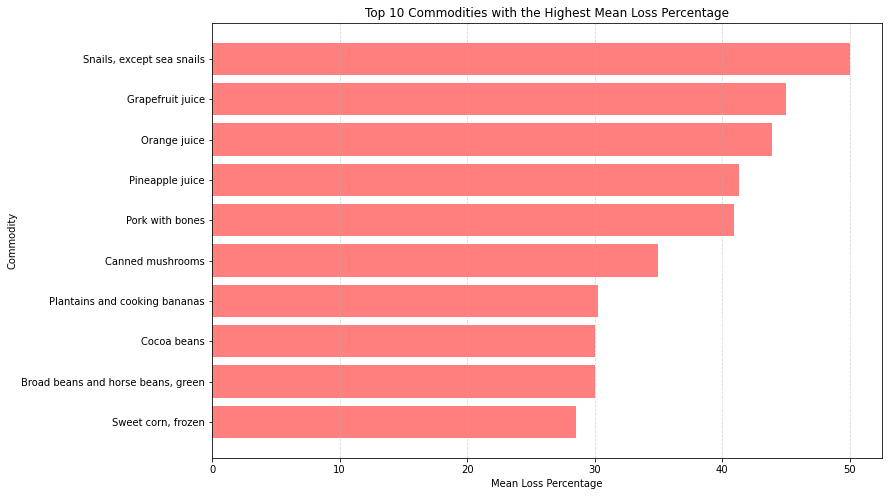

In [13]:
# Stored the values in the dataframe
top_commodities = sorted_commodity.head(10)

# Created a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_commodities.index, top_commodities['loss_percentage'], color='red', alpha=0.5)

plt.xlabel('Mean Loss Percentage')
plt.ylabel('Commodity')
plt.title('Top 10 Commodities with the Highest Mean Loss Percentage')

# Add vertical grid lines
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Invert the y-axis to have the highest value at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

For better understanding the "Commodities with the Highest Mean Loss Percentage" graph in the food waste study, this vertical axis aligned bar graph is especially helpful. It improves readability, is visually beautiful, and highlights significant regions of high food waste. It also allows for simple comparison of commodities with their mean loss percentages among them, gives a natural ranking with the greatest value at the top, and highlights these areas.

The graph shows data on the commodities discarded according to their average percentage of waste. The y-axis displays the numerous commodities squandered, including snails, grapefruit juice, orange juice, pineapple juice, pork with bones, canned mushrooms, cocoa beans, sweet corn, and more. The x-axis shows the mean loss percentage, which ranges from 0 to 35. The pink-colored bars in the graph show the mean loss percentage for each stage.

The chart shows that 'Snails, Except Sea Snails', with a value of around 35%+, are the commodities with the greatest mean loss percentage. 'Sweet corn, frozen' has the lowest mean loss percentage, which is close to 15%.

In the dataset provided above, which appears to be related to food supply and loss percentages, several possible sources of bias can be identified. Bias in this context can affect the accuracy and representativeness of the data. Here are some potential sources of bias:

###Sampling Bias:

If the data collection process selectively sampled certain regions, populations, or time periods while excluding others, it could introduce bias. For example, if data collection was focused on specific geographic areas or specific years, it may not be representative of the entire country or time period.
### Measurement Bias:

Errors or inaccuracies in measuring and recording loss percentages can introduce bias. If measurement instruments were not consistently used or calibrated, or if there were variations in data collection methods, it could lead to biased results.
### Response Bias:

If the data relies on self-reporting or surveys, there may be a potential for response bias. Respondents might provide answers that they believe are socially desirable or that align with certain expectations, rather than reflecting the true values.
### Activity Bias:

The dataset includes a column called "activity," which describes the activity related to food supply. If certain activities were overrepresented or underrepresented in the data, it could introduce bias. For example, if data collection focused more on "Storage" and less on other activities, it could skew the results.
### Selection Bias:

The dataset may not include all possible food supply stages, and certain stages may be omitted intentionally or unintentionally. This could lead to a biased representation of the stages' loss percentages.
###Geographic Bias:

If the dataset includes data from specific geographic regions within a country and those regions have different characteristics or conditions, it could introduce geographic bias. For example, if data is collected primarily from urban areas and not from rural areas, it may not represent the full diversity of food supply conditions.
###Temporal Bias:

If the data is collected primarily from certain years or seasons, it may not capture seasonal variations or long-term trends in loss percentages, introducing temporal bias.
###Data Collection Bias:

The dataset may be sourced from a specific study or organization with its own data collection procedures and biases. If the data collection process was not designed to be representative of the broader context, it can lead to bias.
It's essential to be aware of these potential sources of bias when analyzing and interpreting the dataset. Addressing bias can involve careful data collection and cleaning, transparency about data sources and limitations, and statistical techniques to adjust for bias when possible.

# Conclusion
To conclude, the crucial problem of food loss and waste (FLW) inside the global food supply chain was the focus of our data analysis effort. To further understand this complex issue, we analyzed a large dataset from the Food and Agriculture Organization of the United Nations (FAO) covering the years 2012 to 2022. The following are the main conclusions and implications of our analysis:

1. Food Waste by Stage:
This analysis identifies the parts of the food supply chain where food waste is most likely to occur, offering useful information for resource allocation and focused actions.
2. Food Waste by Year:
This temporal study aids in locating trends and outliers in the evolution of food waste.
3. Food Wastage by Country:
By highlighting areas with high and low food wastage, a heat map showed the disparities in food waste by nation.
4. Food Waste by Commodity:
We discovered and provided the top 10 commodities with the highest mean loss percentages.

In conclusion, our investigation revealed the crucial locations in the world's food supply chain where food waste occurs. Additionally, it emphasized how crucial it is to track changes in food waste over time and take appropriate action. These results can help decision-makers, stakeholders, and policymakers create focused initiatives to decrease food loss and waste, advance sustainability objectives, and support a more effective and equitable food system for all. Our data-driven strategy aims to enhance efforts to successfully combat food waste, which is a global crisis.
